In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import scipy as sp
from tensorflow.keras.utils import to_categorical


In [5]:
train_set = np.load("kmnist-train-imgs.npz")["arr_0"]
train_labels = np.load("kmnist-train-labels.npz")["arr_0"]

test_set = np.load("kmnist-test-imgs.npz")["arr_0"]
test_labels = np.load("kmnist-test-labels.npz")["arr_0"]

length = len(np.unique(train_labels))

train_labels = to_categorical(train_labels, length)
test_labels = to_categorical(test_labels, length)


In [12]:
nsamples, nx, ny = train_set.shape
d2_train_set = train_set.reshape((nsamples,nx*ny))

nsamples, nx, ny = test_set.shape
d2_test_set = test_set.reshape((nsamples,nx*ny))

In [23]:
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(d2_train_set, train_labels)

print(clf.score(d2_test_set, test_labels)*100)

y_true = test_labels
y_pred = clf.predict(d2_test_set)

conMatrix = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))

90.73


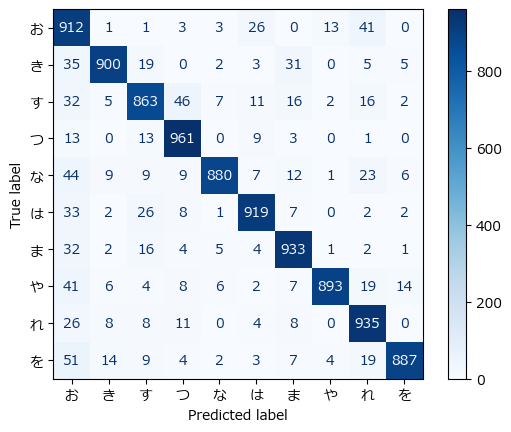

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=conMatrix, display_labels="おきすつなはまやれを")
plt.rcParams['font.family'] = 'Meiryo'
disp.plot(cmap=plt.cm.Blues)
plt.show()

# 92.15 - 1
# 90.73 - 3